<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/PulseAmplitudeModulation_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers the following topics:
1. The periodic pulse train (square wave) in the time and frequency domains.
2. The three sampling methods: natural sampling, flat-topped sampling, and ideal sampling in the time and frequency domains

# The Periodic Pulse Train in the Time and Frequency Domains

A periodic square function is characterized by its amplitude, frequency $f$, and duty cycle. Here, we will generate a square wave function to see how changing the duty cycle affects the signal in the time and frequency domains.

Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

Set the time variables

In [ ]:
Tstart=0
Tstop=10
Tstep=1e-5
t = np.arange(Tstart,Tstop,Tstep)

Plot the periodic pulse train (square wave) in the time domain

(0.0, 1.0)

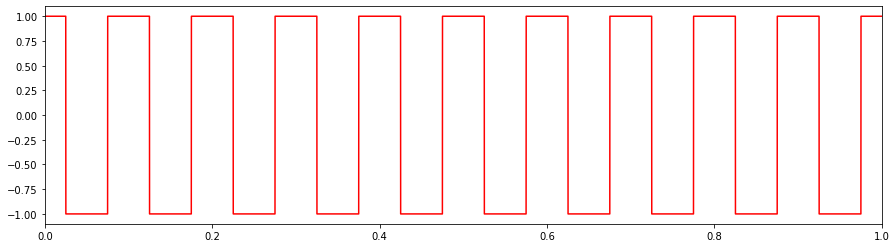

In [ ]:
dty=0.5     # duty cycle of the square wave
f=10        # frequency of the square wave

pt=signal.square(2 * np.pi * f * t +np.pi*dty, duty=dty) # pulse train with duty cycle=dty
                                                         # note that the signal is shifted to the left to start at the center of the ON period 
plt.figure(figsize=(15,4))
plt.plot(t,pt,'r')
plt.xlim(0,1)

Plot the periodic pulse train (square wave) in the frequency domain

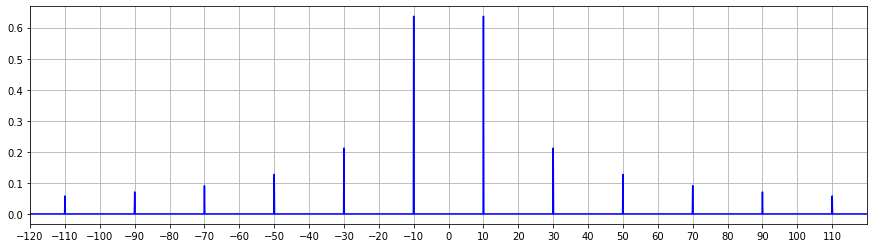

In [ ]:
N=len(t)
PT = np.abs(np.fft.fft(pt))   # pulse train (square wave) in the frequency domain
freqs = np.fft.fftfreq(pt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
PT=PT[idx]/N

lim=120   # x-axis limits
plt.figure(figsize=(15,4))
plt.plot(freqs, PT,'b')
plt.xlim(-lim,lim)
a=list(range(-lim,lim,f))  # to add markers on the figure at integer multiples of f
plt.xticks(a) 
plt.grid()


When the duty cycle is 0.5 the spectral components at $2f$ become zero. Here $f$ is 10, and the spectral components at $2 n f =0$, $n$ is an integer.

**Excercise:** Change the duty cycle to $0.2, 0.4$ and $0.7$, look at the signal in the time domain and then find the value of $n$ at which the $n$th harmonic becomes zero. You can extend the limits of the x-axis.

# The Impulse Train in the Time and Frequency Domains

Let us plot an impulse signal with period $T=0.1$.

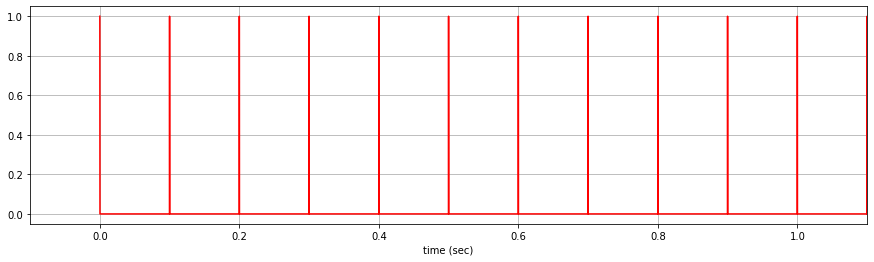

In [ ]:
Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)   # set the time
L=len(t)    
f=10     # frequency of the impulse train
lenT= int(1/(f*Tstep))    # length of of period

impls=np.zeros(L)   # impulse signal, impulse=0 for all t except at t=T it equals to 1
for i in  range (0, L,lenT):
    impls[i]=1
plt.figure(figsize=(15,4))
plt.plot(t, impls,'r')
plt.xlim(-.1,1.1)
plt.xlabel('time (sec)')
plt.grid()

Let us plot the impulse signal in the frequency domain. Note that there is an impulse at integer multiples of $f=\frac{1}{T} = 10$

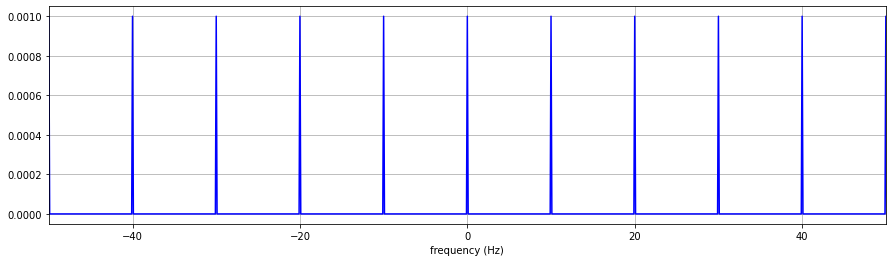

In [ ]:
N=len(t)           
IMPLS = np.abs(np.fft.fft(impls))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMPLS=IMPLS[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, IMPLS,'b')
plt.xlim(-50,50)
plt.xlabel('frequency (Hz)')
plt.grid()

# Ideal Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **ideal sampling method**.  The sampled signal is generated by multiplying the message signal by an impulse train with period $Ts$. The sampling frequency here is $f_s=20Hz$.

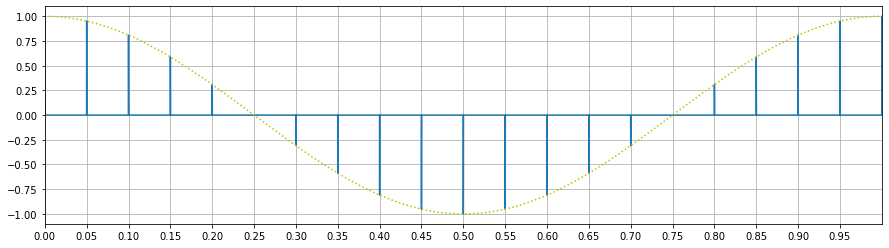

In [ ]:
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=20    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal
plt.figure(figsize=(15,4))
plt.plot(t, mtIdeal, t,mt,'y:')
plt.xlim(0,1)

xticks = np.arange(0, 1, 1/fs)
plt.xticks(xticks)
plt.grid()

**Excercise:** Change the sampling frequency $f_s$ to $5, 10$ and $30$ and observe the changes on the sampled signal.

Let us now show how the sampled signal differes from the message signal.

First let us look at the message signal in frequency domain

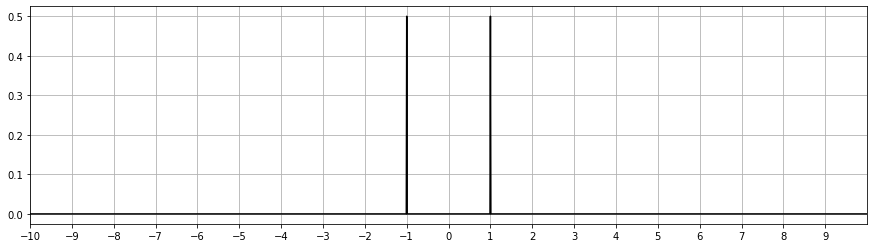

In [ ]:
N=len(t)         
MF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF=MF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MF,'k')
plt.xlim(-10,10)
xticks = np.arange(-10, 10, fm)
plt.xticks(xticks)
plt.grid()

Now let us look at the impulse signal in frequency domain

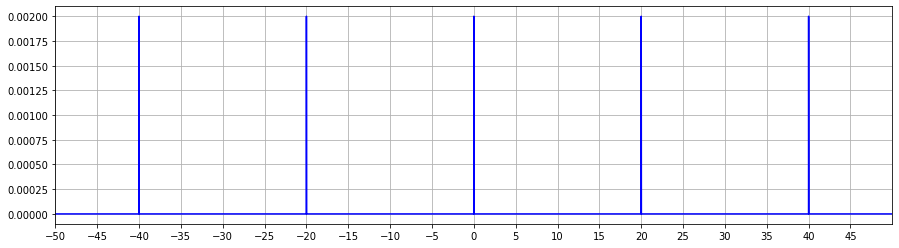

In [ ]:
N=len(t)   
IMP= np.abs(np.fft.fft(impls))
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, IMP,'b')
plt.xlim(-50,50)
xticks = np.arange(-50, 50, 5)
plt.xticks(xticks)
plt.grid()

And finally let us plot the sampled signal in the frequency domain

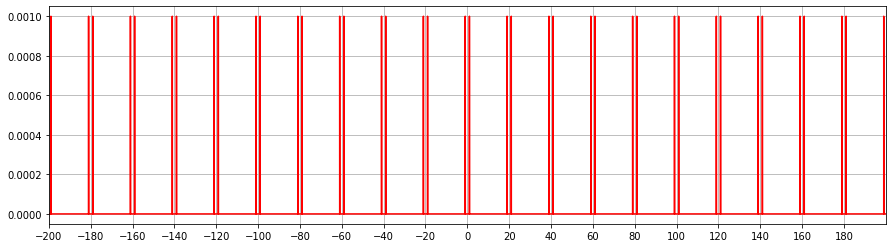

In [ ]:
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, SF,'r')
plt.xlim(-200,200)
xticks = np.arange(-200, 200, 20)
plt.xticks(xticks)
plt.grid()

To view the details of the amplitude spectrum of the signal, we will zoom in as shown below

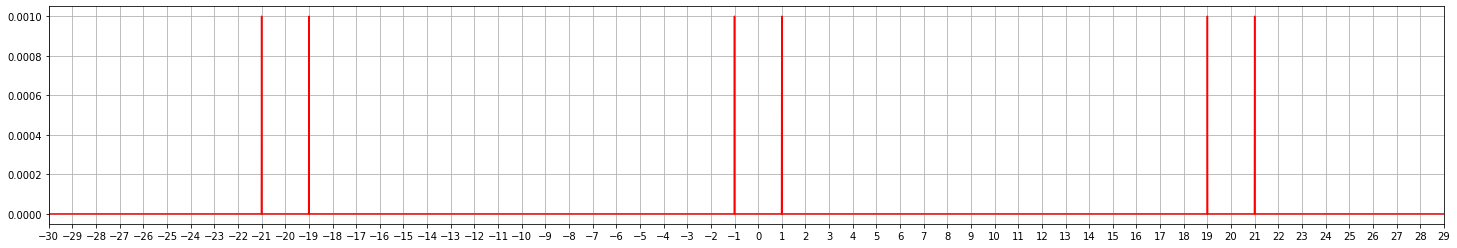

In [ ]:
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
plt.figure(figsize=(25,4))
plt.plot(freqs, SF,'r')
plt.xlim(-25,25)
xticks = np.arange(-30, 30, 1)
plt.xticks(xticks)
plt.grid()

**Signal Reconstruction (LPF)**: Now we will use Low Pass filter to reconstruct the message signal from the samples. Let us define a Butterworth Low Pass filter with Bandwidth equal to $f_{3dB}$.

In [ ]:
#f3db : cut-off frequency
#forder: order of the filter
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
    fs=1/Tstep
    nyq = 0.5 * fs
    normal_cutoff = f3db / nyq
    b, a = signal.butter(forder, normal_cutoff, btype='low', analog=False)
    y = signal.lfilter(b, a, rt)
    return y

Let us plot the frequency response of the LPF

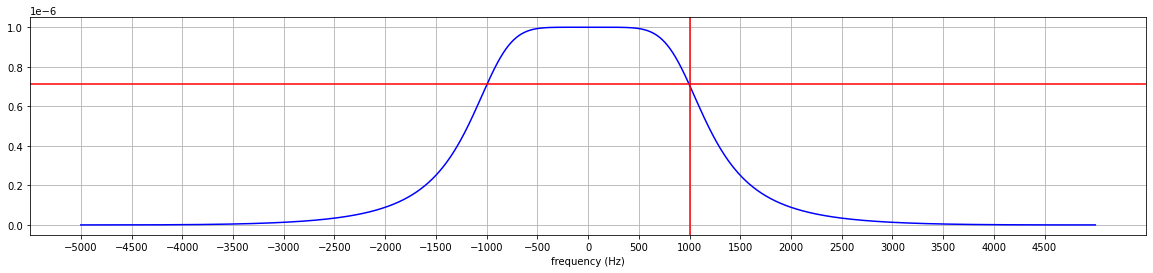

In [ ]:
# LPF parameters 
f3db = 1000  # Cut-off frequency of the filter
forder=3 # order of the filter

L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the transfer function of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
plt.figure(figsize=(20,4))
plt.plot(freqs, FILTER_OUTPUT,'b')
plt.xlabel('frequency (Hz)')
xticks = np.arange(np.min(freqs), np.max(freqs), 500)
plt.xticks(xticks)
plt.grid()
plt.axvline(f3db, color='r')
plt.axhline(np.max(FILTER_OUTPUT)/1.4, color='r')


As expected, the frequency response represent a Low Pass filter with cut-off at $f_{3dB}$. 

**Exercise**: Change the cut-off freuency of the filter and observe the frequency response.

Next, we will apply the LPF to the sampled signal to the constructed signal. We will plot the sampled signal and the reconstructed signal in the time and frequency domain

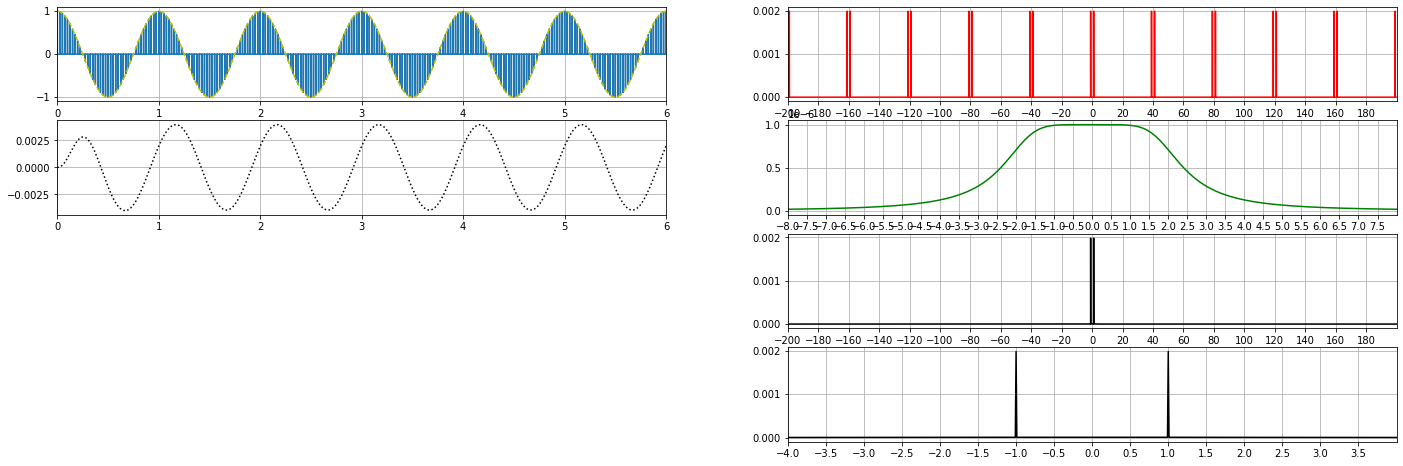

In [ ]:
## Parameters of message signal
fm=1    # frequency of message signal
Am=1    # amplitude of message signal

## sampling parameters
fs=40    # frequency of the periodic pulse train 

# LPF parameters 
f3db = 2  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,8))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax6 = f.add_subplot(426)
ax8 = f.add_subplot(428)

ax1.plot(t, mtIdeal, t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

ax3.plot(t, mtIdeal_reconstructed,'k:')
ax3.set_xlim(0,6/fm)
ax3.grid()

## In the frequency domain
##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax2.set_xticks(xticks)
ax2.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal_reconstructed))
freqs = np.fft.fftfreq(mtIdeal_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax6.plot(freqs, SF,'k')
ax6.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax6.set_xticks(xticks)
ax6.grid()


ax8.plot(freqs, SF,'k')
ax8.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm/2)
ax8.set_xticks(xticks)
ax8.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax4.plot(freqs, FILTER_OUTPUT,'g')
ax4.set_xlabel('frequency (Hz)')
ax4.set_xlim(-8*fm, 8*fm)
xticks = np.arange(-8*fm, 8*fm, fm/2)
ax4.set_xticks(xticks)
ax4.grid()


**Exercise**: Change the cut-off freuency of the filter to and observe the frequency response.

Let use consider a new message signal $m(t) = A_{m1}\cos( 2 \pi f_{m1}t)+A_{m2}\cos( 2 \pi f_{m2}t)$. Let use ideal sampling to sample this signal abd then use LPF to reconstruct the original message.

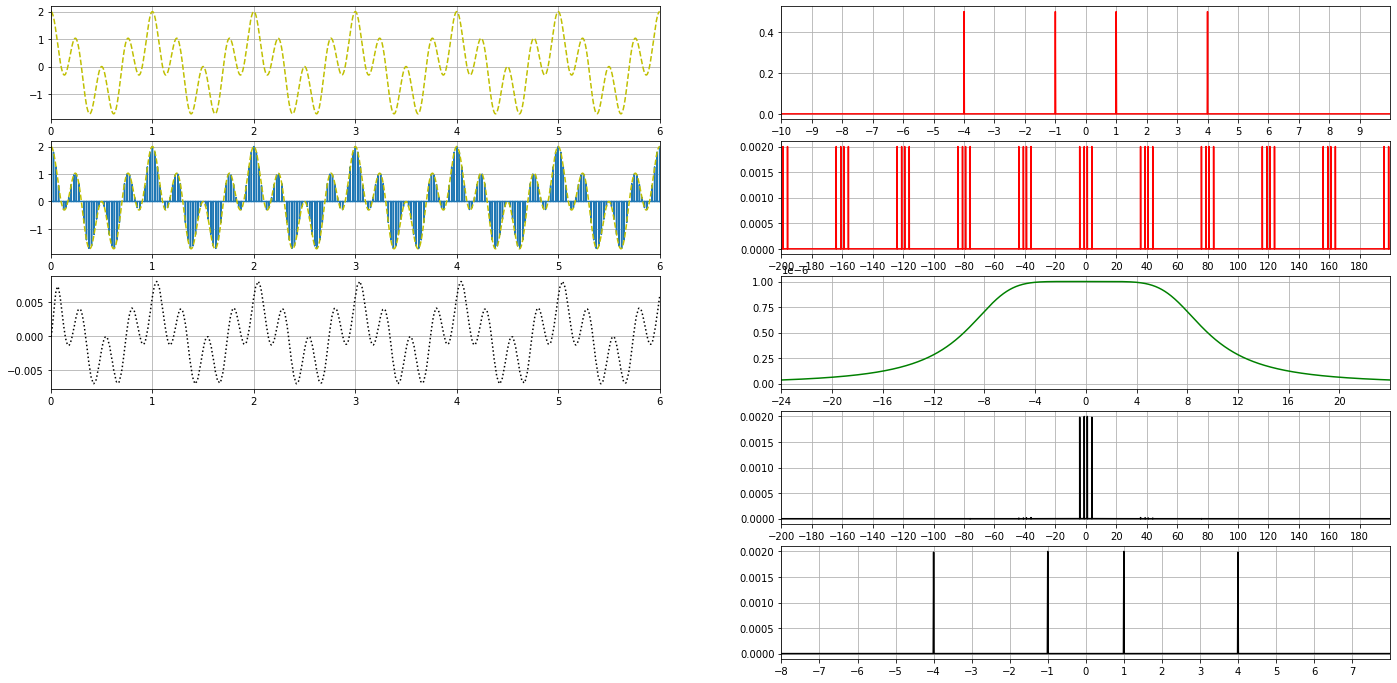

In [ ]:
## Parameters of message signal
fm1=1    # frequency of message signal (1)
Am1=1    # amplitude of message signal (1)

fm2=4    # frequency of message signal (2)
Am2=1    # amplitude of message signal (2)


## sampling parameters
fs=40    # frequency of the periodic pulse train 

# LPF parameters 
f3db = 8  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am1*np.cos(2 * np.pi * fm1* t) + Am2*np.cos(2 * np.pi * fm2* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

fm=min(fm1,fm2)
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

ax3.plot(t, mtIdeal, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()

ax5.plot(t, mtIdeal_reconstructed,'k:')
ax5.set_xlim(0,6/fm)
ax5.grid()

## In the frequency domain
##Original Signal
N=len(t)   
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-2*(fm1+fm2), 2*(fm1+fm2))
xticks = np.arange(-2*(fm1+fm2), 2*(fm1+fm2), min(fm1,fm2))
ax2.set_xticks(xticks)
ax2.grid()


##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal))
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, SF,'r')
ax4.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtIdeal_reconstructed))
freqs = np.fft.fftfreq(mtIdeal_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax8.plot(freqs, SF,'k')
ax8.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax8.set_xticks(xticks)
ax8.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-2*max(fm1,fm2), 2*max(fm1,fm2))
xticks = np.arange(-2*max(fm1,fm2), 2*max(fm1,fm2), max(fm1,fm2)/4)
ax10.set_xticks(xticks)
ax10.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax6.plot(freqs, FILTER_OUTPUT,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-3*f3db, 3*f3db)
xticks = np.arange(-3*f3db, 3*f3db, f3db/2)
ax6.set_xticks(xticks)
ax6.grid()

# Natural Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **natural sampling method**. The sampled signal is generated my multiplying the message signal by a periodic pulse train. The sampling frequency is $f_s=20Hz$

(0.0, 1.0)

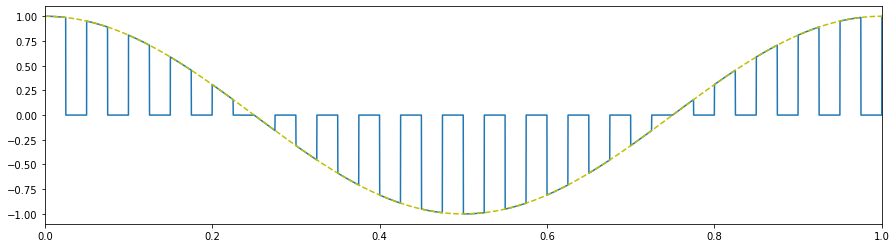

In [ ]:
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
fs=20    # frequency of the periodic pulse train
dty=0.5 # duty cycle
ptrain=0.5*(1+signal.square(2 * np.pi * fs * t, duty=dty))
fm=1
Am=1
mt=Am*np.cos(2 * np.pi * fm* t) # message signal
st=mt*ptrain                    # sampled signal
mtNatural= mt*ptrain    # sampled signal

plt.figure(figsize=(15,4))
plt.plot(t,mtNatural,t,mt,'y--')          
plt.xlim(0,1)

**Excercise:** Change the frequency and the duty cycle of the pulse train (square wave) to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

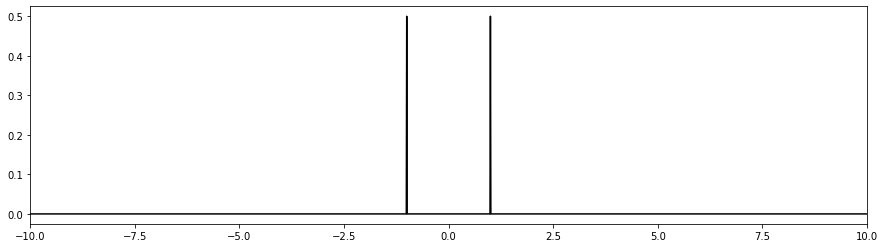

In [ ]:
N=len(t)         
MF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF=MF[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MF,'k')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

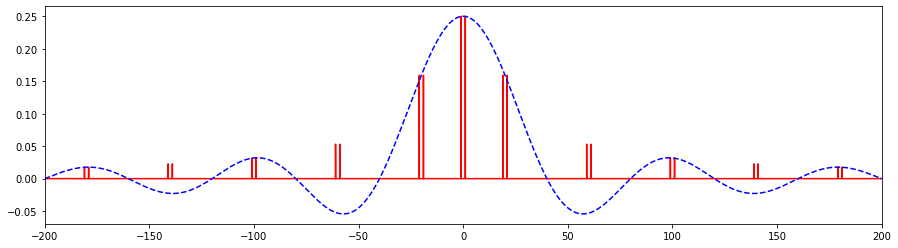

In [ ]:
N=len(t)   
MFNatural= np.abs(np.fft.fft(mtNatural))
freqs = np.fft.fftfreq(mtNatural.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]

MFNatural=MFNatural[idx]/N    # Sampled signal in the frequency domain

sincEnvelope=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFNatural,'r', freqs,sincEnvelope,'b--')
plt.xlim(-200,200)

**Excercise:** Compare the last figure with the spectrum of the ideally-sampled signal (in section 2) What do you observe?

Let us zoom in and compare the aplitude of each pair of impulses located at $f_s$. We notice that each pair has the same amplitude.

(-40.0, 40.0)

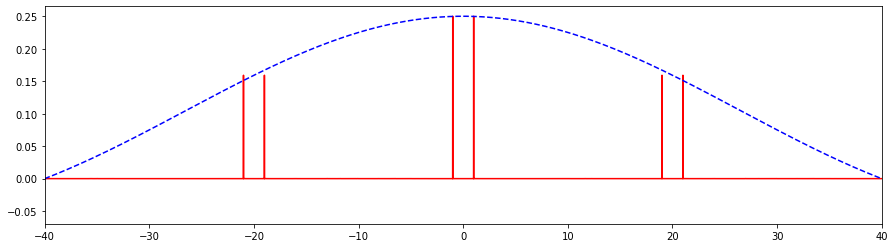

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(freqs, MFNatural,'r', freqs,sincEnvelope,'b--')
plt.xlim(-40,40)

Next, we will apply the LPF to the **natural-sampled signal** to construct the original message

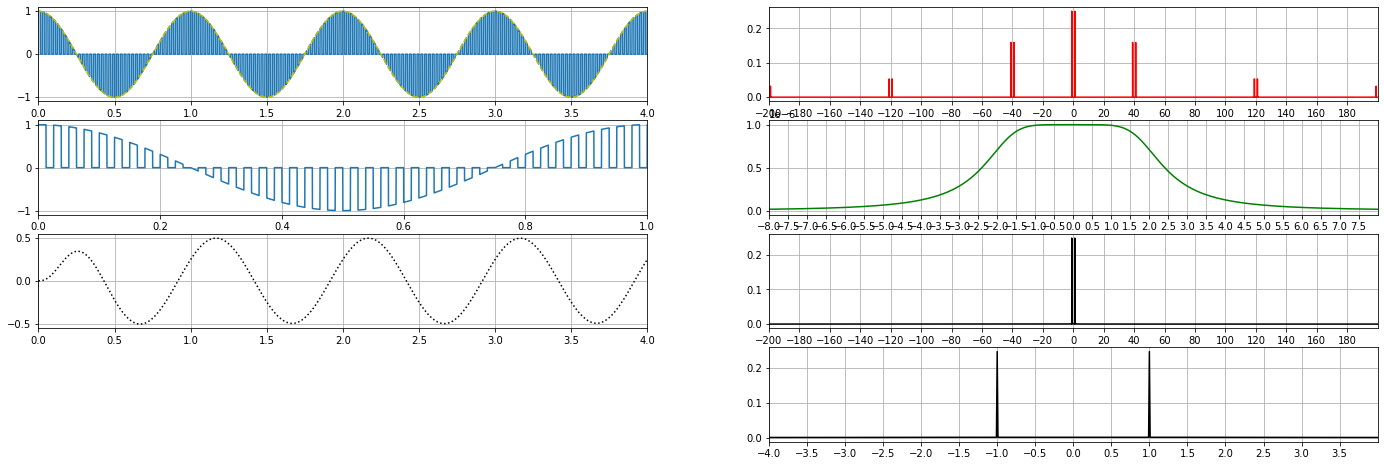

In [ ]:
## Parameters of message signal
fm=1    # frequency of message signal
Am=1    # amplitude of message signal

## sampling parameters
fs=40    # frequency of the periodic pulse train 
dty=0.5 # duty cycle

# LPF parameters 
f3db = 2  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal
ptrain=0.5*(1+signal.square(2 * np.pi * fs * t, duty=dty))
st=mt*ptrain                    # sampled signal
mtNatural= mt*ptrain    # sampled signal

## Reconstruction using LPF
mtNatural_reconstructed = func_filter(mtNatural,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,8))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax8 = f.add_subplot(428)

ax1.plot(t, mtNatural, t,mt,'y--')
ax1.set_xlim(0,4/fm)
ax1.grid()

ax3.plot(t, mtNatural)
ax3.set_xlim(0,1/fm)
ax3.grid()

ax5.plot(t, mtNatural_reconstructed,'k:')
ax5.set_xlim(0,4/fm)
ax5.grid()

## In the frequency domain
##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtNatural))
freqs = np.fft.fftfreq(mtNatural.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax2.set_xticks(xticks)
ax2.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtNatural_reconstructed))
freqs = np.fft.fftfreq(mtNatural_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax6.plot(freqs, SF,'k')
ax6.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax6.set_xticks(xticks)
ax6.grid()


ax8.plot(freqs, SF,'k')
ax8.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm/2)
ax8.set_xticks(xticks)
ax8.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax4.plot(freqs, FILTER_OUTPUT,'g')
ax4.set_xlabel('frequency (Hz)')
ax4.set_xlim(-8*fm, 8*fm)
xticks = np.arange(-8*fm, 8*fm, fm/2)
ax4.set_xticks(xticks)
ax4.grid()

Let use consider a new message signal $m(t) = A_{m1}\cos( 2 \pi f_{m1}t)+A_{m2}\cos( 2 \pi f_{m2}t)$. Let use ideal sampling to sample this signal abd then use LPF to reconstruct the original message.

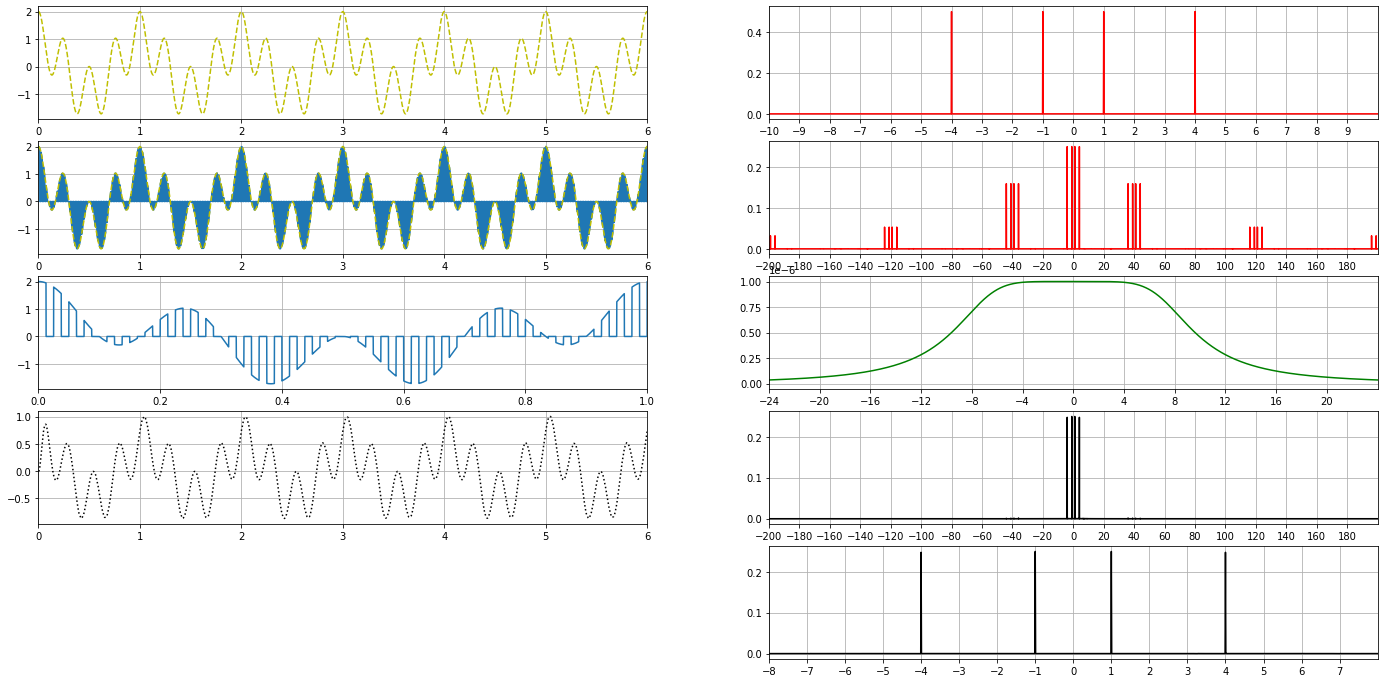

In [ ]:
## Parameters of message signal
fm1=1    # frequency of message signal (1)
Am1=1    # amplitude of message signal (1)

fm2=4    # frequency of message signal (2)
Am2=1    # amplitude of message signal (2)


## sampling parameters
fs=40    # frequency of the periodic pulse train 
dty=0.5 # duty cycle

# LPF parameters 
f3db = 8  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am1*np.cos(2 * np.pi * fm1* t) + Am2*np.cos(2 * np.pi * fm2* t) # message signal
ptrain=0.5*(1+signal.square(2 * np.pi * fs * t, duty=dty))
st=mt*ptrain                    # sampled signal
mtNatural= mt*ptrain    # sampled signal

## Reconstruction using LPF
mtNatural_reconstructed = func_filter(mtNatural,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

fm=min(fm1,fm2)
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

ax3.plot(t, mtNatural, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()


ax5.plot(t, mtNatural)
ax5.set_xlim(0,1/fm)
ax5.grid()


ax7.plot(t, mtNatural_reconstructed,'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()

## In the frequency domain
##Original Signal
N=len(t)   
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-2*(fm1+fm2), 2*(fm1+fm2))
xticks = np.arange(-2*(fm1+fm2), 2*(fm1+fm2), min(fm1,fm2))
ax2.set_xticks(xticks)
ax2.grid()


##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtNatural))
freqs = np.fft.fftfreq(mtNatural.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, SF,'r')
ax4.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtNatural_reconstructed))
freqs = np.fft.fftfreq(mtNatural_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax8.plot(freqs, SF,'k')
ax8.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax8.set_xticks(xticks)
ax8.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-2*max(fm1,fm2), 2*max(fm1,fm2))
xticks = np.arange(-2*max(fm1,fm2), 2*max(fm1,fm2), max(fm1,fm2)/4)
ax10.set_xticks(xticks)
ax10.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax6.plot(freqs, FILTER_OUTPUT,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-3*f3db, 3*f3db)
xticks = np.arange(-3*f3db, 3*f3db, f3db/2)
ax6.set_xticks(xticks)
ax6.grid()

# Flat-Topped Sampling in the Time and Frequency Domains

Let us now sample the signal $m(t) = \cos( 2 \pi f_mt)$ using the **flat-topped sampling method**.  The sampled signal is generated using the sample and hold method, which means that the message signal is sampled at time $Ts$, and the value of the signal is held for a fraction of the sampling period that can be controlled using the duty cycle. The sampling frequency here is $f_s=20Hz$.

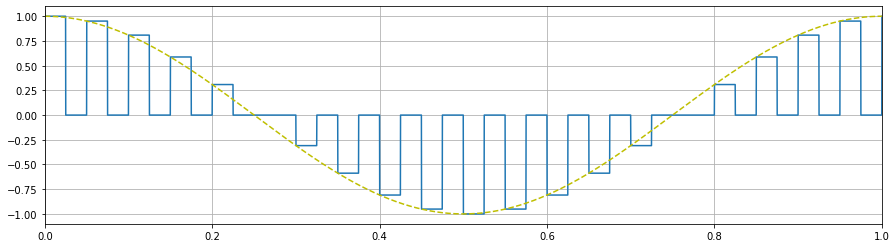

In [ ]:
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence

fs=20    # frequency of the periodic pulse train 
dty=0.5 # duty cycle of periodic pulse train
lenTs= int(1/(fs*Tstep))   # length of period

fm=1    # frequency of message signal
Am=1    # amplitude of message signal
mt=Am*np.cos(2 * np.pi * fm* t) # message signal

mtFlat=np.zeros(L)
for i in  range (0, L,lenTs):
    mtFlat[i:i+int(lenTs*dty)-1]=mt[i]   # sampled signal

plt.figure(figsize=(15,4))
plt.xlim(0,1)
plt.plot(t, mtFlat,t,mt,'y--')
plt.grid()

**Excercise:** Change the sampling frequency and the duty cycle to see their effect on the sampled signal. Try $f_s=30, 10$ and $5$, then with $f_s=10$ change the duty cycle to 0.2, and 0.7.

First let us look at the message signal in frequency domain

(-10.0, 10.0)

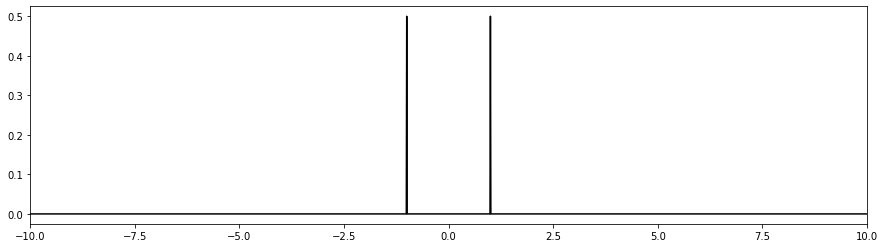

In [ ]:
N=len(t)         
MT = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MT=MT[idx]/N
plt.figure(figsize=(15,4))
plt.plot(freqs, MT,'k')
plt.xlim(-10,10)

Now let us look at the sampled signal in frequency domain

(-200.0, 200.0)

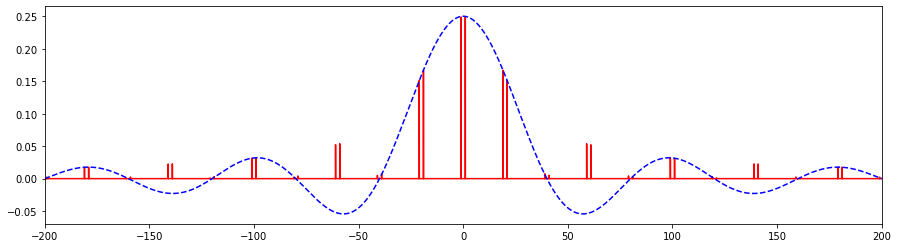

In [ ]:
N=len(t)   
MFFlat= np.abs(np.fft.fft(mtFlat))
freqs = np.fft.fftfreq(mtFlat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MFFlat=MFFlat[idx]/N
sincEnvelopeFlat=0.5*dty*np.sinc(freqs*dty/fs) # the envelope of the sampled signal follows a sinc function
                          # tau here is equal to dty/fs

plt.figure(figsize=(15,4))
plt.plot(freqs, MFFlat,'r',freqs,sincEnvelopeFlat,'b--')
plt.xlim(-200,200)

Let us zoom in and compare the aplitude of each pair of impulses located at $f_s$. We notice that each pair has the same amplitude.

(-30.0, 30.0)

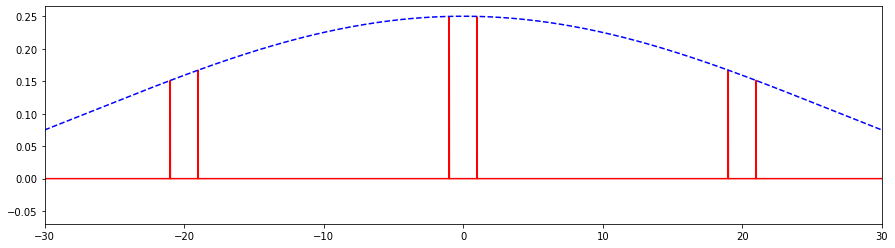

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(freqs, MFFlat,'r',freqs,sincEnvelopeFlat,'b--')
plt.xlim(-30,30)

**Excercise:** Compare the last figure with the spectrum of the ideally-sampled signal (in section 2) What do you observe?

Next, we will apply the LPF to the **flat-top sampled signal** to construct the original message

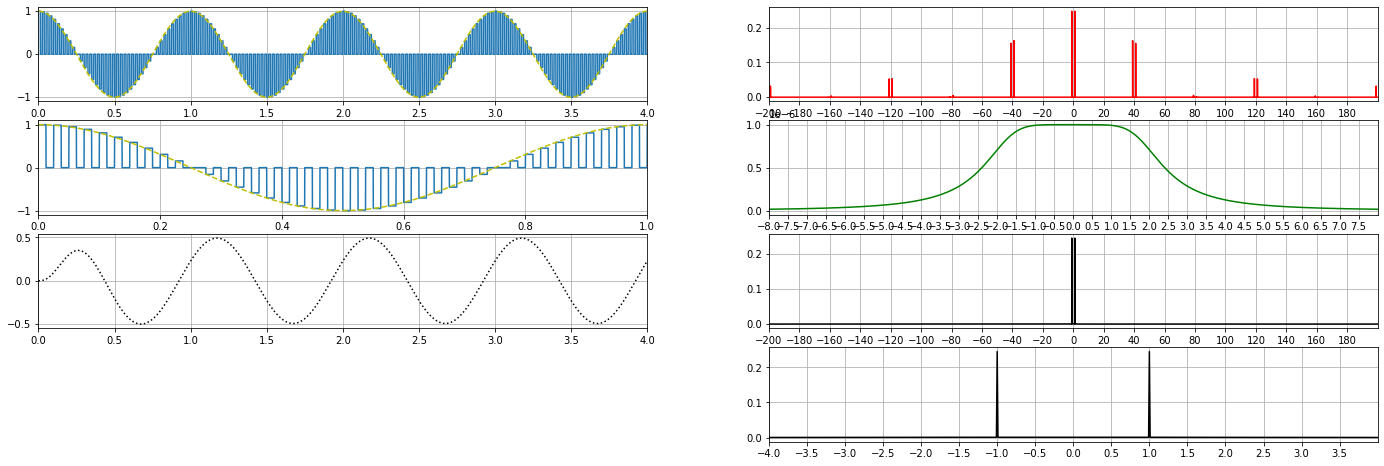

In [ ]:
## Parameters of message signal
fm=1    # frequency of message signal
Am=1    # amplitude of message signal

## sampling parameters
fs=40    # frequency of the periodic pulse train 
dty=0.5 # duty cycle

# LPF parameters 
f3db = 2  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

mtFlat=np.zeros(L)
for i in  range (0, L,lenTs):
    mtFlat[i:i+int(lenTs*dty)-1]=mt[i]   # sampled signal

## Reconstruction using LPF
mtFlat_reconstructed = func_filter(mtFlat,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,8))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax8 = f.add_subplot(428)

ax1.plot(t, mtFlat, t,mt,'y--')
ax1.set_xlim(0,4/fm)
ax1.grid()

ax3.plot(t, mtFlat, t,mt,'y--')
ax3.set_xlim(0,1/fm)
ax3.grid()

ax5.plot(t, mtFlat_reconstructed,'k:')
ax5.set_xlim(0,4/fm)
ax5.grid()

## In the frequency domain
##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtFlat))
freqs = np.fft.fftfreq(mtFlat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax2.set_xticks(xticks)
ax2.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtFlat_reconstructed))
freqs = np.fft.fftfreq(mtFlat_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax6.plot(freqs, SF,'k')
ax6.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax6.set_xticks(xticks)
ax6.grid()


ax8.plot(freqs, SF,'k')
ax8.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm/2)
ax8.set_xticks(xticks)
ax8.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax4.plot(freqs, FILTER_OUTPUT,'g')
ax4.set_xlabel('frequency (Hz)')
ax4.set_xlim(-8*fm, 8*fm)
xticks = np.arange(-8*fm, 8*fm, fm/2)
ax4.set_xticks(xticks)
ax4.grid()

Let use consider a new message signal $m(t) = A_{m1}\cos( 2 \pi f_{m1}t)+A_{m2}\cos( 2 \pi f_{m2}t)$. Let use flat-top sampling to sample this signal abd then use LPF to reconstruct the original message.

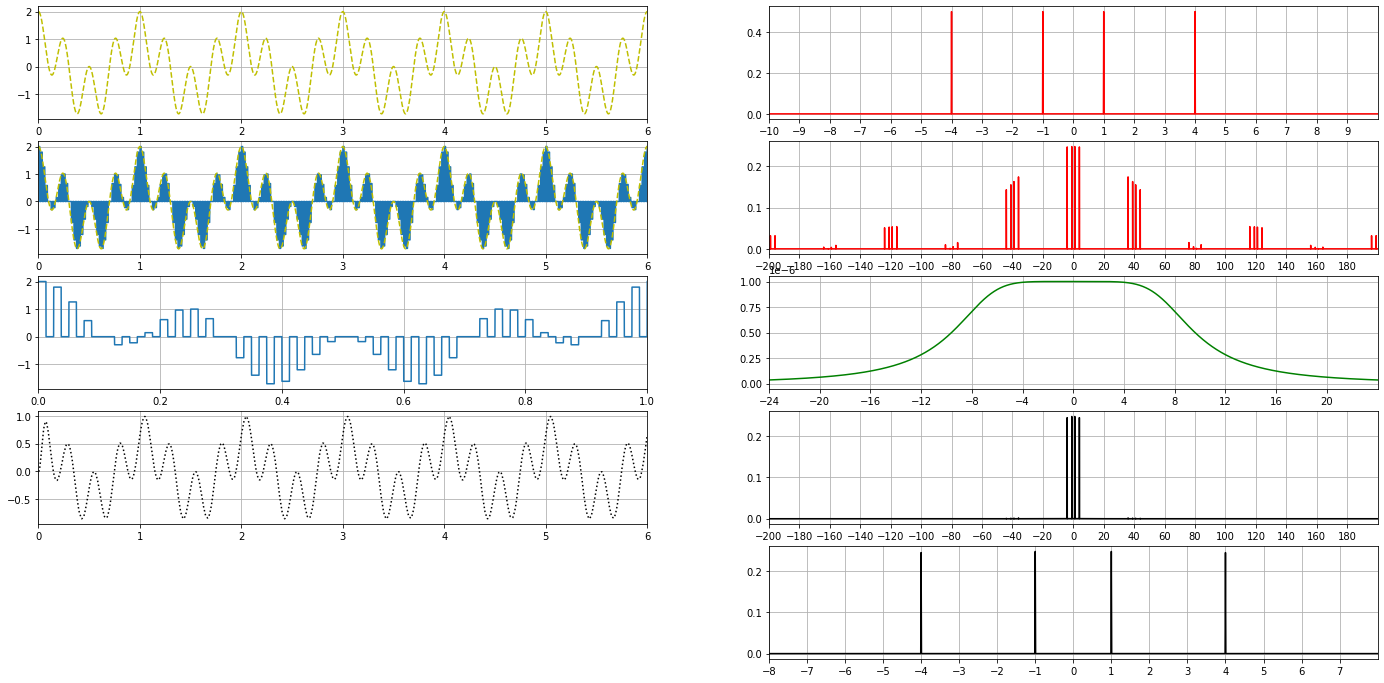

In [ ]:
## Parameters of message signal
fm1=1    # frequency of message signal (1)
Am1=1    # amplitude of message signal (1)

fm2=4    # frequency of message signal (2)
Am2=1    # amplitude of message signal (2)

## sampling parameters
fs=40    # frequency of the periodic pulse train 
dty=0.5 # duty cycle

# LPF parameters 
f3db = 8  # Cut-off frequency of the filter
forder=3 # order of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am1*np.cos(2 * np.pi * fm1* t) + Am2*np.cos(2 * np.pi * fm2* t) # message signal
mtFlat=np.zeros(L)
for i in  range (0, L,lenTs):
    mtFlat[i:i+int(lenTs*dty)-1]=mt[i]   # sampled signal


## Reconstruction using LPF
mtFlat_reconstructed = func_filter(mtFlat,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

fm=min(fm1,fm2)
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

ax3.plot(t, mtFlat, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()


ax5.plot(t, mtFlat)
ax5.set_xlim(0,1/fm)
ax5.grid()


ax7.plot(t, mtFlat_reconstructed,'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()

## In the frequency domain
##Original Signal
N=len(t)   
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-2*(fm1+fm2), 2*(fm1+fm2))
xticks = np.arange(-2*(fm1+fm2), 2*(fm1+fm2), min(fm1,fm2))
ax2.set_xticks(xticks)
ax2.grid()


##Sampled Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtFlat))
freqs = np.fft.fftfreq(mtFlat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, SF,'r')
ax4.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Reconstructed Signal
N=len(t)   
SF = np.abs(np.fft.fft(mtFlat_reconstructed))
freqs = np.fft.fftfreq(mtFlat_reconstructed.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax8.plot(freqs, SF,'k')
ax8.set_xlim(-200,200)
xticks = np.arange(-200, 200, 20)
ax8.set_xticks(xticks)
ax8.grid()

ax10.plot(freqs, SF,'k')
ax10.set_xlim(-2*max(fm1,fm2), 2*max(fm1,fm2))
xticks = np.arange(-2*max(fm1,fm2), 2*max(fm1,fm2), max(fm1,fm2)/4)
ax10.set_xticks(xticks)
ax10.grid()

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
ax6.plot(freqs, FILTER_OUTPUT,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-3*f3db, 3*f3db)
xticks = np.arange(-3*f3db, 3*f3db, f3db/2)
ax6.set_xticks(xticks)
ax6.grid()